In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2
from google.colab.patches import cv2_imshow
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
input_folder = '/content/gdrive/MyDrive/dataCS433/WT'
output_folder='/content/gdrive/MyDrive/AugmentedDataCS433/WT'


In [ ]:
def add_sp_noise(image):

    img = image.copy()
    # Getting the dimensions of the image
    row , col = img.shape[:2]
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 3000 and 50000 (we have 512x512 images)
    number_of_pixels = random.randint(3000, 50000)
    for i in range(number_of_pixels):
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(3000 , 100000)
    for i in range(number_of_pixels):
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img


In [ ]:
for img in glob.glob(input_folder+"/*.png"):
  #Loading the original images
  image = cv2.imread(img)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_original'+'.png',image)
  #Vertical flip
  vflip = cv2.flip(image,1)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_VFlipped'+'.png',vflip)
  #Horizontal flip
  hflip = cv2.flip(image,0)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_HFlipped'+'.png',hflip)
  #Vertical and horizontal flip
  vhflip = cv2.flip(image,-1)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_VHFlipped'+'.png',vhflip)
  #Rotations to the left and to the right
  height,width = image.shape[:2]
  lrot=cv2.warpAffine(image,
                      cv2.getRotationMatrix2D((width/2,height/2), angle=90, scale=1),
                      (width,height))
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_LRot'+'.png',lrot)
  rrot=cv2.warpAffine(image,
                      cv2.getRotationMatrix2D((width/2,height/2), angle=270, scale=1),
                      (width,height))
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_RRot'+'.png',rrot)
  #Random Gaussian noise
  #mean,stddev = 0,180
  #noise = np.zeros(image.shape, np.uint8)
  #cv2.randn(noise, mean, stddev)
  #gaussnoisy = cv2.add(image, noise)
  #cv2.imwrite(output_folder+img[len(input_folder):-4]+'_GaussNoisy'+'.png',gaussnoisy)
  #Random salt and pepper noise
  saltpeppernoisy1= add_sp_noise(image)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_SaltPepperNoisy1'+'.png',saltpeppernoisy1)
  saltpeppernoisy2= add_sp_noise(image)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_SaltPepperNoisy2'+'.png',saltpeppernoisy2)



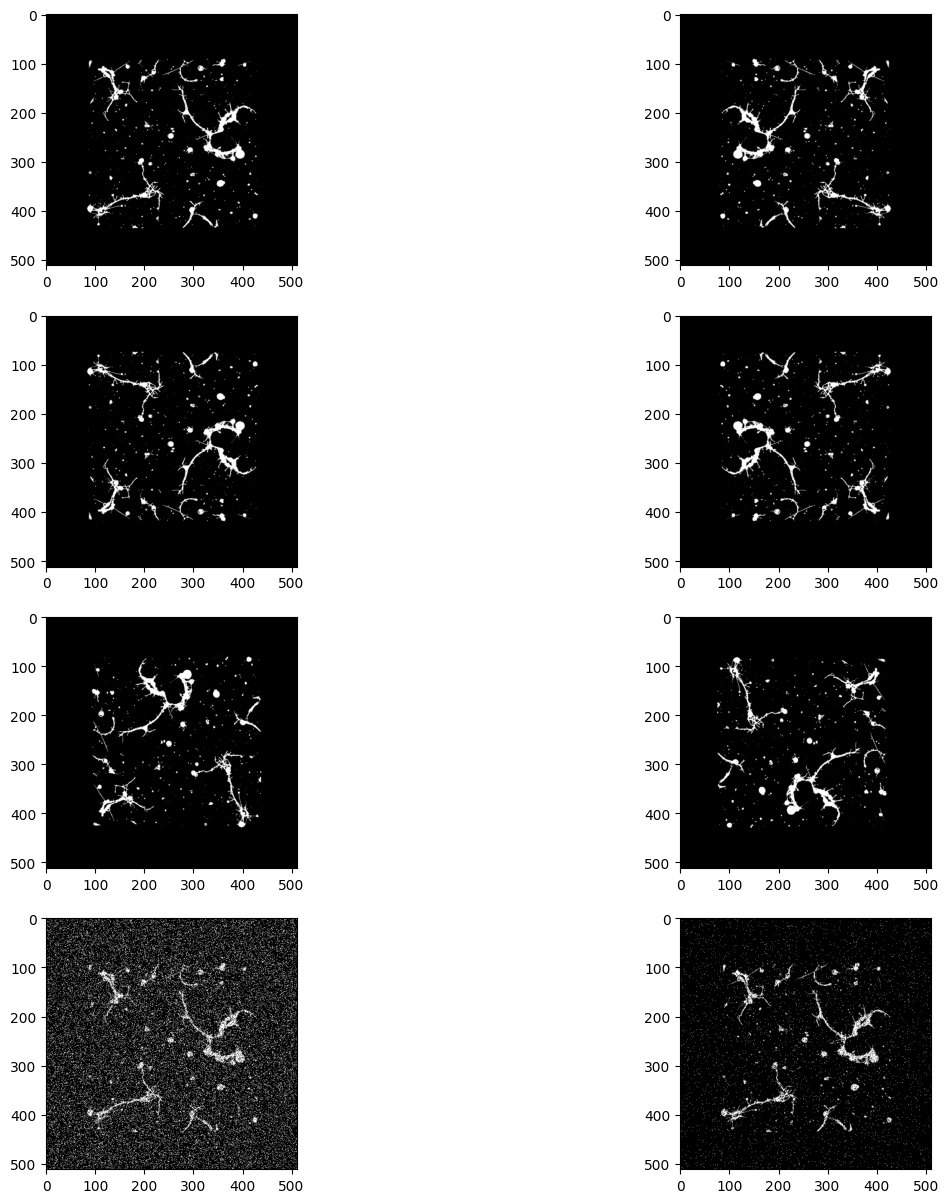

In [ ]:
sample=[image,vflip,hflip,vhflip,lrot,rrot,saltpeppernoisy1,saltpeppernoisy2]

for img in sample:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sample)):
  axes[i//2,i%2].imshow(sample[i])

In [ ]:
input_folder = '/content/gdrive/MyDrive/dataCS433/DISEASED'
output_folder='/content/gdrive/MyDrive/AugmentedDataCS433/DISEASED'

In [ ]:
for img in glob.glob(input_folder+"/*.png"):
  #Loading the original images
  image = cv2.imread(img)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_original'+'.png',image)
  #Vertical flip
  vflip = cv2.flip(image,1)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_VFlipped'+'.png',vflip)
  #Horizontal flip
  hflip = cv2.flip(image,0)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_HFlipped'+'.png',hflip)
  #Vertical and horizontal flip
  vhflip = cv2.flip(image,-1)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_VHFlipped'+'.png',vhflip)
  #Rotations to the left and to the right
  height,width = image.shape[:2]
  lrot=cv2.warpAffine(image,
                      cv2.getRotationMatrix2D((width/2,height/2), angle=90, scale=1),
                      (width,height))
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_LRot'+'.png',lrot)
  rrot=cv2.warpAffine(image,
                      cv2.getRotationMatrix2D((width/2,height/2), angle=270, scale=1),
                      (width,height))
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_RRot'+'.png',rrot)
  #Random Gaussian noise
  #mean,stddev = 0,180
  #noise = np.zeros(image.shape, np.uint8)
  #cv2.randn(noise, mean, stddev)
  #gaussnoisy = cv2.add(image, noise)
  #cv2.imwrite(output_folder+img[len(input_folder):-4]+'_GaussNoisy'+'.png',gaussnoisy)
  #Random salt and pepper noise
  saltpeppernoisy1= add_sp_noise(image)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_SaltPepperNoisy1'+'.png',saltpeppernoisy1)
  saltpeppernoisy2= add_sp_noise(image)
  cv2.imwrite(output_folder+img[len(input_folder):-4]+'_SaltPepperNoisy2'+'.png',saltpeppernoisy2)


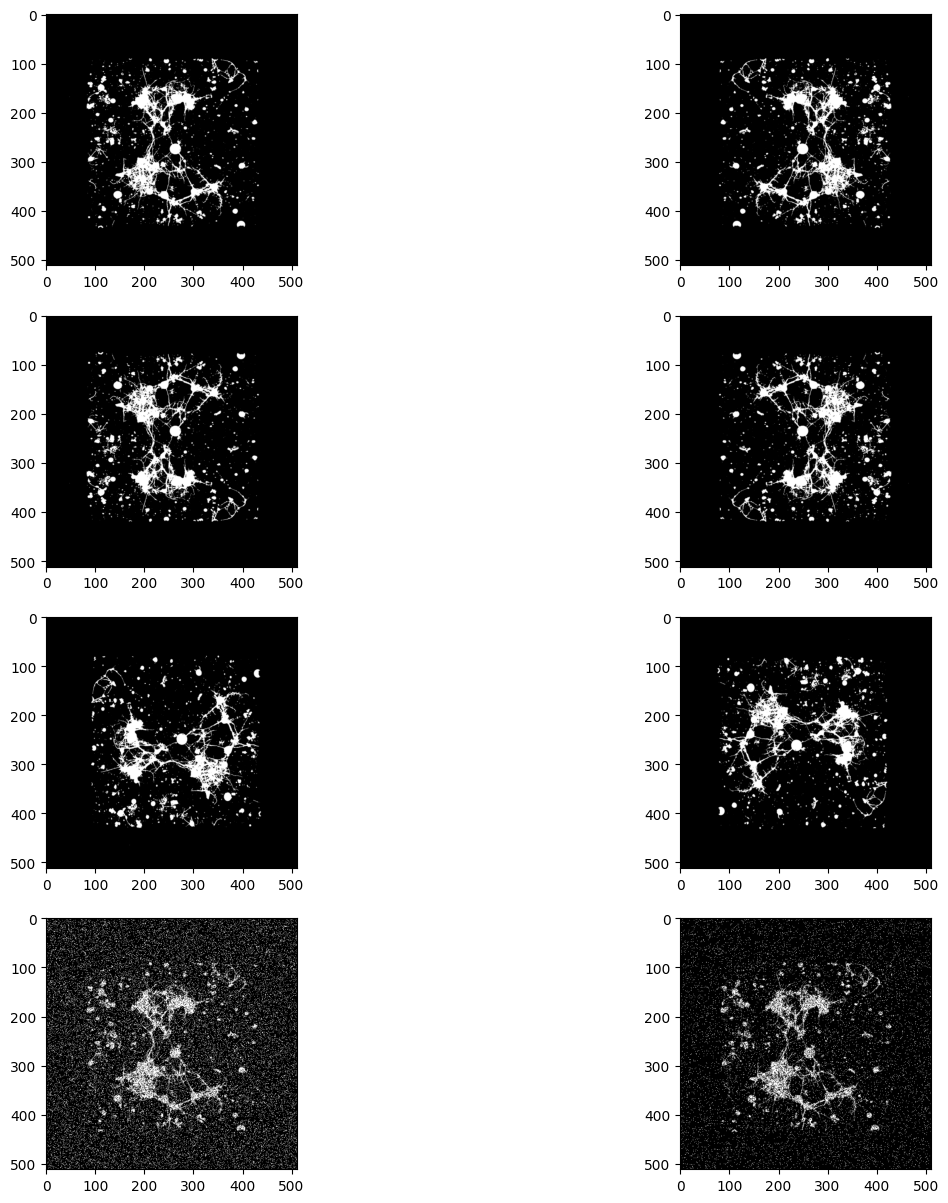

In [ ]:
sample=[image,vflip,hflip,vhflip,lrot,rrot,saltpeppernoisy1,saltpeppernoisy2]

for img in sample:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sample)):
  axes[i//2,i%2].imshow(sample[i])